In [2]:
import pandas as pd
import numpy as np
root = '../dataset/hi'
root_soh = '../dataset/soh_charge'


In [3]:

def load_and_process(root, root_soh, dataset):
    hiv = pd.read_csv(f'{root}/hiv-charge-CS2_{dataset}.csv')
    soh = pd.read_csv(f'{root_soh}/soh-CS2_{dataset}.csv')

    # Mantieni solo le colonne da hiv e soh
    df = pd.merge(hiv, soh, how="right", on="cycle")[["cycle", "hi_v", "SOH"]]
    return df

# Carica e processa i dataset
df_35 = load_and_process(root, root_soh, 35)
df_36 = load_and_process(root, root_soh, 36)
df_38 = load_and_process(root, root_soh, 38)

# Crea le variabili df serparate per ogni dataset, hiv e soh separate
df_35_hiv = df_35[["cycle", "hi_v"]]
df_35_soh = df_35[["cycle", "SOH"]]
df_36_hiv = df_36[["cycle", "hi_v"]]
df_36_soh = df_36[["cycle", "SOH"]]
df_38_hiv = df_38[["cycle", "hi_v"]]
df_38_soh = df_38[["cycle", "SOH"]]

# Elimina la colonna cycle dai df
df_35_hiv = df_35_hiv.drop(columns=["cycle"])
df_35_soh = df_35_soh.drop(columns=["cycle"])
df_36_hiv = df_36_hiv.drop(columns=["cycle"])
df_36_soh = df_36_soh.drop(columns=["cycle"])
df_38_hiv = df_38_hiv.drop(columns=["cycle"])
df_38_soh = df_38_soh.drop(columns=["cycle"])


# Salva i dataset
# df_35_hiv.to_csv(f'{root}/hiv_35.csv', index=False)
# df_35_soh.to_csv(f'{root_soh}/soh_35.csv', index=False)
# df_36_hiv.to_csv(f'{root}/hiv_36.csv', index=False)
# df_36_soh.to_csv(f'{root_soh}/soh_36.csv', index=False)
# df_38_hiv.to_csv(f'{root}/hiv_38.csv', index=False)
# df_38_soh.to_csv(f'{root_soh}/soh_38.csv', index=False)

# Stampa i dataset
print(df_35_hiv)
print(df_35_soh)
print(df_36_hiv)
print(df_36_soh)
print(df_38_hiv)
print(df_38_soh)



          hi_v
0    25.486136
1    23.861111
2    23.865501
3    23.032055
4    22.778535
..         ...
792   4.188914
793   4.188642
794   4.065530
795   3.943356
796   4.067687

[797 rows x 1 columns]
          SOH
0    1.156806
1    1.132868
2    1.132423
3    1.132210
4    1.127613
..        ...
792  0.311893
793  0.312044
794  0.308795
795  0.303900
796  0.305063

[797 rows x 1 columns]
          hi_v
0    25.531173
1    23.757588
2    23.858216
3    23.000478
4    22.899201
..         ...
822   1.336601
823   1.242275
824   1.413041
825   1.454523
826   1.436719

[827 rows x 1 columns]
          SOH
0    1.159089
1    1.139739
2    1.139088
3    1.138794
4    1.136330
..        ...
822  0.159022
823  0.159606
824  0.162734
825  0.164879
826  0.163638

[827 rows x 1 columns]
          hi_v
0    25.417674
1    23.982112
2    24.101577
3    23.153644
4    23.027349
..         ...
899   3.576621
900   3.576648
901   3.699357
902   3.578159
903   3.574943

[904 rows x 1 columns]
    

In [4]:
import numpy as np
import random
# split a univariate sequence into samples
def split_sequence(data, seq_length):
    X, y = [],[]
    
    for j in data:
        for i in range(len(j) - seq_length - 1):
            X.append(j[i:i+seq_length])
            y.append(j[i + 1:i+seq_length + 1])
        
    return np.array(X),np.array(y)

In [14]:
seq_length = 10

def split_sequence(data, seq_length):
    X, y = [],[]
    
    for j in data:
        for i in range(len(j) - seq_length - 1):
            X.append(j[i:i+seq_length])
            y.append(j[i + 1:i+seq_length + 1])
        # for i in range(len(j) - seq_length):
        #     X.append(j[i:i+seq_length])
        #     y.append(j[i+seq_length])
#  for i in range(len(sequence)):
#     # find the end of this pattern
#     end_ix = i + n_steps
#     # check if we are beyond the sequence
#     if end_ix > len(sequence)-1:
#         break
#     # gather input and output parts of the pattern
#     seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        # X.append(seq_x)
        # y.append(seq_y)
    # X_1,y_1 = np.array(X), np.array(y)  
    # X_1,y_1 = np.random.shuffle(X_1), np.random.shuffle(y_1)
    return np.array(X),np.array(y)


# Assuming df_36_hiv, df_38_hiv, df_36_soh, df_38_soh, df_35_soh are defined

# Create sequences for training set
X_train_hiv = split_sequence([df_36_hiv, df_38_hiv], seq_length)
y_train_soh = split_sequence([df_36_soh, df_38_soh], seq_length)



# Calculate mean and std for normalization
mean = X_train_hiv.mean()
std = X_train_hiv.std()
mean1 = y_train_soh.mean()
std1 = y_train_soh.std()

# Normalize the data
X_train = (X_train_hiv - mean) / std
y_train = (y_train_soh - mean1) / std1

# Shuffle the sequences
np.random.shuffle(X_train)
np.random.shuffle(y_train)

# Create sequences for testing set
X_test = split_sequence([df_35_hiv], seq_length)
y_test = split_sequence([df_35_soh], seq_length)

# Normalize the test data using the mean and std from training data
X_test = (X_test - mean) / std
y_test = (y_test - mean1) / std1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


AttributeError: 'tuple' object has no attribute 'mean'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras import optimizers


n_steps = 10
n_features = 1

#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape, n_steps)

adam = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999)
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, n_features), return_sequences= False))
model.add(Dense(1))
model.compile(optimizer=adam, loss='mse')

(1713, 10, 1) 10


In [7]:
# fit model
history = model.fit(X_train, y_train, epochs=5000, batch_size=128, verbose=1)


Epoch 1/5000
14/14 [==============================] - 0s 6ms/step - loss: 1.0046
Epoch 2/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9997
Epoch 3/5000
14/14 [==============================] - 0s 7ms/step - loss: 1.0003
Epoch 4/5000
14/14 [==============================] - 0s 7ms/step - loss: 1.0009
Epoch 5/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9998
Epoch 6/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9991
Epoch 7/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9999
Epoch 8/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9989
Epoch 9/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9996
Epoch 10/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9989
Epoch 11/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9995
Epoch 12/5000
14/14 [==============================] - 0s 7ms/step - loss: 0.9999
Epoch 13/5000
14/14 [====

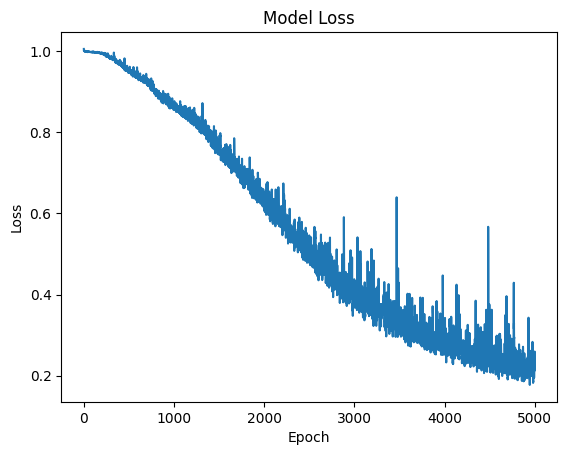

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [9]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.20 MSE (0.45 RMSE)
Test Score: 1.65 MSE (1.28 RMSE)


25/25 [==============================] - 0s 2ms/step
(788, 1)


ValueError: x and y can be no greater than 2D, but have shapes (788,) and (788, 10, 1)

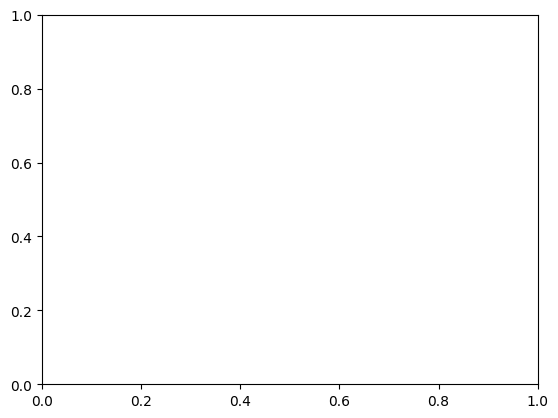

In [12]:
# Predici i valori sul dataset di test
y_pred = model.predict(X_test)
print(y_pred.shape)

# # Plotta i valori reali e i valori predetti destandardizzati per il file 35
plt.plot(y_test, label='Real', color='blue')
# plt.plot(y_pred, label='Predicted (destandardized)', color='red')
plt.title('Real vs Predicted, File 35')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
# Predici i valori sul dataset di test
y_pred = model.predict(X_test)
print(y_pred.shape)

# Reshape y_test to match the shape of y_pred
y_test_reshaped = y_test.reshape(y_pred.shape)

# Plotta i valori reali e i valori predetti destandardizzati per il file 35
plt.plot(y_test_reshaped, label='Real', color='blue')
# plt.plot(y_pred, label='Predicted (destandardized)', color='red')
plt.title('Real vs Predicted, File 35')
plt.xlabel('Cycle')
plt.ylabel('Value')
plt.legend()
plt.show()

25/25 [==============================] - 0s 2ms/step
(788, 1)


ValueError: cannot reshape array of size 7880 into shape (788,1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Funzione per preparare i dati per l'addestramento del modello LSTM
def prepare_data(df, look_back=1):
    data = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    x, y = [], []
    for i in range(len(data_scaled) - look_back):
        x.append(data_scaled[i:(i + look_back), 0])
        y.append(data_scaled[i + look_back, 1])

    return np.array(x), np.array(y), scaler

# Caricamento e pre-processing dei dati di addestramento (df_36_38)
look_back = 10  # Imposta la dimensione della finestra temporale per la predizione
x_train, y_train, scaler_train = prepare_data(df_36_38, look_back)

# Reshape per input LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Creazione del modello LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Addestramento del modello
model.fit(x_train, y_train, epochs=1000, batch_size=128, verbose=1)

# Preparazione dei dati di test (df_35)
x_test, y_test, scaler_test = prepare_data(df_35, look_back)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predizione utilizzando il modello addestrato
y_pred = model.predict(x_test)

# Rescala i dati predetti utilizzando lo scaler dei dati di test
y_pred = scaler_test.inverse_transform(np.concatenate((x_test[:, -1, :], y_pred.reshape(-1, 1)), axis=1))[:, 1]

# Plot della predizione
plt.plot(df_35["SOH"].values, label='True SOH')
plt.plot(y_pred, label='Predicted SOH')
plt.legend()
plt.title('LSTM Model Prediction on Test Data')
plt.show()
